<a href="https://colab.research.google.com/github/yonyusarang/AI-contents/blob/main/knn_%EB%94%94%EC%A7%80%ED%84%B8_%EB%AC%B8%EC%84%9C_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. KNN 분류 (KNN classifier) 모형의 이론

### (1) 개념

 데이터로부터 거리가 가까운 k개의 다른 데이터들의 레이블을 참조하여 분류하는 알고리즘으로 분류나 회귀에 사용되는 비모수 방식이다.

 KNN 분류에서 출력은 소속된 항목이다. 객체는 k개의 최근접 이웃 사이에서 가장 공통적인 항목에 할당되는 객체로 과반수 의결에 의해 분류된다(k는 양의 정수이며 통상적으로 작은 수). 만약 k = 1 이라면 객체는 단순히 하나의 최근접 이웃의 항목에 할당된다.
KNN 회귀에서 출력은 객체의 특성 값이다. 이 값은 k개의 최근접 이웃이 가진 값의 평균이다.
KNN은 함수가 오직 지역적으로 근사하고 모든 계산이 분류될 때까지 연기되는 인스턴스 기반 학습 또는 게으른 학습의 일종이다. k-NN 알고리즘은 가장 간단한 기계 학습 알고리즘에 속한다.

 이웃은 항목(k-NN 분류의 경우)이나 객체 특성 값(k-NN 회귀의 경우)이 알려진 객체의 집합으로부터 구해진다. 이것은 명시적인 훈련 과정이 필요하지는 않지만, 알고리즘을 위한 훈련 집합이라고 생각될 수 있다.

이 알고리즘은 유명한 기계 학습 기법인 k-평균과 아무 관련이 없으므로 혼동하지 않아야 한다.

 출처 : 위키피디아

###(2) 기본원리

1. 숫자 k와 거리 측정 기준을 선택한다.
2. k개의 최근접 이웃을 찾는다.
3. 다수결 투표를 통해 클래스 레이블을 할당한다.

<img src='https://drive.google.com/uc?export=download&id=1kmnmAxK-TmNL_6n2sCPadQ5fQhcLcT45' width="350" height ="350">

위 그래프에서 새로운 데이터(빨간점)와 가까운 이웃 3개의 레이블이 모두 Class A(파란점)이므로 Class A로 분류할 수 있다.


<img src='https://drive.google.com/uc?export=download&id=145iZ4yE4GsOW-uAMncSe6NU7wYwfTKRp' width="350" height="350">

위 그래프에서 새로운 데이터(빨간점)와 가까운 이웃 3개의 레이블이 모두 Class B(초록점)이므로 Class B로 분류할 수 있다.

<img src='https://drive.google.com/uc?export=download&id=1CPWau9SpzfzymPWEkP4Vt2__xa9AfLDb' width="350" height ="350">

위 그래프에서 새로운 데이터(빨간점)와 가까운 이웃 3개 중 Class A(초록점)가 더 많으므로 Class A로 분류할 수 있다.

#### (2)-1 가까운 거리 측정

가까운 이웃 데이터가 어떤 데이터인지를 판단하기 위해서는 데이터 간 거리를 측정하는 것이 필요하다. 거리 측정법에는 유클리드 거리, 맨해튼 거리 등이 있다.

*   유클리드 거리(Euclidean Distance)

: 두 점 사이의 직선 거리를 구하는 방법

<img src='https://drive.google.com/uc?export=download&id=1bnX-LtuAK-Z7UOWT6zUaZo8DGsH3CcR9' width="300" height ="">


A와 B 사이의 거리는 피타고라스의 정리를 이용하여 구할 수 있다.
$$\sqrt{(1-4)^2+(1-3)^2}=\sqrt{13}$$

즉, A($a_1, a_2$)와 B($b_1, b_2$) 사이의 거리는 다음과 같이 구할 수 있다. $$\sqrt{(a_1-b_1)^2+(a_2-b_2)^2}$$ 

n개의 속성이 있는 n차원의 경우 $A(a_1, a_2, a_3, $$\dots$$ a_n)와 B(b_1, b_2, b_3, $$\dots$$ b_n)$ 의 데이터는 시각화는 불가능하지만 거리는 다음과 같이 구할 수 있다.

$$d(A,B)= \sqrt{(a_1-b_1)^2+(a_2-b_2)^2+(a_3-b_3)^2+(a_4-b_4)^2+...+(a_n-b_n)^2}$$ 

= $$\sqrt{\sum_{i=1}^{n}{(a_i-b_i)}^2}$$




*   맨해튼 거리 (Manhattan Distance)

: 맨해튼은 계획 도시이기 때문에 건물들이 정방형 모양으로 들어서 있다. 건물에서 다른 건물까지의 실제 이동거리는 건물을 관통하여 지나갈 수 없기 때문에 직선 거리가 아니다. 맨해튼 거리 측정법은 실제 이동 거리로 거리를 측정하는 방법이다.

 <img src='https://drive.google.com/uc?export=download&id=1qwj6v8l__KGXA1n-RR8RXtq8GtQVY_mE' width="300" height ="">

d= |1-4| + |1-3| = 5

n개의 속성이 있는 n차원의 경우 $A(a_1, a_2, a_3, $$\dots$$ a_n)와 B(b_1, b_2, b_3, $$\dots$$ b_n)$ 의 거리는 다음과 같이 구할 수 있다.

d=$$\sum_{i=1}^{n}{|a_i-b_i|}$$






KNN 모델에서는 보통 유클리디안 거리 측정법을 사용한다. 



### (3) k의 개수

**k가 어떤 숫자면 좋을까?**

* 만약, k가 5라면?

<img src="https://drive.google.com/uc?export=download&id=1XGoq_d6vb6yf4Gh3fYciODUg4mb20t6C" width="350" height ="350">

> 선정된 5개의 최근접 데이터 중 Class A 레이블에 해당하는 데이터가 3개, Class B 레이블에 해당하는 데이터가 2개이므로 새로운 테스트 데이터는 Class A로 분류됨을 알 수 있다. 

* 만약, k가 4라면?

<img src="https://drive.google.com/uc?export=download&id=128pYB46E0PQsJANoCBs-QP6ArYtmkn1t" width="350" height ="350">

위 예시 그래프처럼 k가 짝수일 경우, 각 레이블에 속하는 데이터의 개수가 동률이 된다. 이런 경우, 새로운 입력 데이터를 분류할 수 없는 상황이 발생할 수 있다.

따라서, k는 홀수로 설정하는 것이 좋다.

**그렇다면 k가 너무 작거나 커도 괜찮을까?**

만약, k가 매우 작은 값이면 어떨까?

* k=1일 때,

<img src="https://drive.google.com/uc?export=download&id=1QwfVE4CgNAxTigzT3xpkLyEP4qtwdZX3" width="350" height ="350">

<img src="https://drive.google.com/uc?export=download&id=17eN_OcI6KzmEuDbYpECNBtcDzT61wchH" width="350" height ="350">

> 다음의 두 개의 예시 그래프처럼, k의 값이 너무 작을 경우, 분류 결과가 전체적인 데이터의 경향을 반영하지 못하고 제일 가까이에 있는 데이터 하나에 좌우되는 과대적합(overfitting)이 발생할 수 있다.

만약, k가 매우 큰 값이면 어떨까?

* 만약, k가 25라면?

<img src="https://drive.google.com/uc?export=download&id=1PykLDhiOnDV2N5102AwxRWV6N6bv_oDf" width="350" height ="350">

> 위 예시 그래프의 훈련 데이터는 총 25개이다. (Class A 12개, Class B 13개)

> 이 때, k를 25(훈련 데이터 전체)로 지정할 경우, 테스트 데이터는 그 위치에 상관 없이 항상 Class B로 분류된다.

이와 같이 훈련 데이터 전체 개수를 k값으로 지정하는 극단적인 경우에는, 점과 점 사이의 거리는 더 이상 의미 없게 된다. 테스트 데이터에 상관 없이 항상 동일한 레이블(가장 많은 데이터 수를 가진 레이블)로 분류하게 된다.

**그렇다면 최적의 K는 어떻게 알 수 있을까?**

최적의 k값은 학습할 데이터 모델과 요소에 따라 다르며, 다양한 k 값에 따른 분류 정확도를 측정하여 가장 정확도가 높은 k값을 선정할 수 있다.

> 예를 들어, 총 100개의 데이터 중 80%는 훈련 데이터로, 20%는 테스트 데이터로 사용하는 모델이 있다.

> 이 모델에서 최적의 k를 찾기 위해 k의 범위를 3부터 100까지 홀수로만 지정하고, 각 k를 대상으로 분류 정확도를 검증하여 저장하고 시각화하면 다음과 같은 그래프가 나온다.
(k를 1부터 지정하지 않는 이유는, 최적의 k가 1이 되는 경우를 배제하기 위해서이다.)

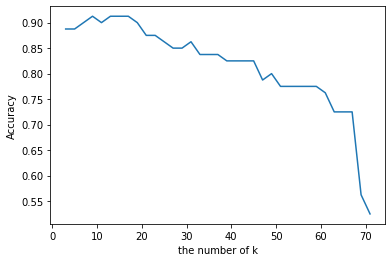

In [ ]:
#k에 따른 정확도 시각화
import matplotlib.pyplot as plt

plt.plot(k_list, cross_vaildation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#최적의 k 찾기
k = k_list[cross_vaildation_scores.index(max(cross_vaildation_scores))]
print("The best number of k : " + str(k))

The best number of k : 9


> 위 그래프에서, 분류 정확도가 조금씩 증가하다가 k가 9일 때 최대치를 기록하고 그 이후로는 감소하는 것을 알 수 있다.

> 따라서 해당 데이터 모델에서 최적의 k값은 9라고 할 수 있다.

### (4) 샘플링 편향

표본(sampling)이란..?

표본은 대규모 데이터 집합인 모집단에서 추출된 데이터의 부분 집합이다. 데이터 품질은 종종 데이터 양보다 더 중요하다. 따라서 많은 오류가 통계 모델과 실험에 잠복하여 무효한 결과를 초래할 수 있기 때문에 양질의 데이터를 획득하는 것은 유효한 결론을 도출하는 데 중요한 절차이다.

데이터 표본 편향(Data Sampling Bias)이란..? 

데이터 표본 편향은 데이터 세트 편향의 가장 일반적인 유형 중 하나로 특정 유형의 인스턴스를 다른 유형보다 많이 선택하여 데이터 세트가 실제 세계를 제대로 나타내지 못하게 되는 데이터 세트에서 발생하는 편향이다.

인공지능 학습에 사용되는 자료가 수집 단계에서 문제가 생긴다면 데이터 샘플링 편향이 생긴다. 구체적으로 수집된 데이터가 프로그램이 실행될 것으로 예상되는 환경을 정확하게 나타내지 않을 때 발생한다.

출처: Forbes, "How AI Can Go Terribly Wrong: 5 Biases That Create Failure"

<img src='https://miro.medium.com/max/1400/1*vQaWlc16cmfb2d27hZ4fsQ.png' width="350" height ="350">

출처: Vahid Naghshin(2021). What is the Sampling Bias? Analytics Vidhya.

####데이터 표본 편향(Data Sampling Bias) 예시

* 아마존(Amazon): 아마존에서 AI 채용 프로그램을 개발했는데, 실제 적용하기 전 최종 시뮬레이션 과정에서 남성 지원자가 여성 지원자보다 지속적으로 더욱 높은 점수를 받는 편향이 일어났다. 원인을 분석했고, 아마존이라는 기업의 직원 구성에 그 원인이 있었다. 인공지능 채용 프로그램은 해당 기업에서 높은 성과와 좋은 평가를 받았던 직원들의 데이터를 기준으로 판단하게 되는데, 아마존은 IT 기업으로써 개발직군이 전체 직원수의 70% 이상을 차지했고, 그러한 개발직군 중 남자 직원수가 여성보다 압도적으로 많았기 때문이다. 결국 모수에서 남성 직원 중에 고성과자가 훨씬 더 많을 수밖에 없었으므로 이를 근거로 판단한 인공지능은 당연히 남성 지원자를 우대할 수밖에 없었던 것이다. 결국 아마존은 해당 AI 채용 프로그램을 폐기했다.

출처: 전창배(2021. 10. 14.). 아마존 채용 AI는 왜 남성을 우대했나. 한국일보.

* 구글: 구글 이미지 검색에서 성별 편향의 예시를 확인 할 수 있는데, 좌측은 교수Professor를 우측은 교사Teacher를 검색한 결과이다. 검색어 자체에는 어떠한 성별과 정보도 담고 있지 않지만, 사회의 구조에서 나타나는 직업별 성비에 의하여 교수는 주로 칠판 앞의 남성 이미지가 교사는 주로 칠판 앞의 여성 이미지가 검색된다. 또한 두 가지 경우 모두 유색인종이 거의 나타나지 않는다.

<img src='https://horizon.kias.re.kr/wp-content/uploads/2021/10/AI-2.jpg' width="350" height ="350">

* 1936년 미국의 대통령 선거 설문조사: 1936년 미국의 대통령 선거를 앞두고 대중잡지인 <리터러리 다이제스트(Literary Digest)>는 설문조사를 실시했다. 1천만 명에게 우편으로 설문지를 보내 240만 명에게서 응답을 받았다. 그 분석 결과를 토대로 공화당 알프레드 랜던(Alfred Landon) 후보의 당선을 예측했다. 조사를 위한 표본을 잡지의 정기구독자, 전화번호부, 자동차 등록명부, 사교클럽 인명부에서 임의로 뽑았다. 그러나 당시 잡지를 구독하는 대부분의 사람은 중산층 이상이었다. 이는 왜곡된 표본추출이 어떤 결과를 초래하는지 보여주는 대표적인 사례이다.

출처: 남선혜(2012.11.30.). 부분으로 전체를 파악하는 표본조사. KDI 경제정보센터

데이터 편향(Data bias) 종류

1) Response or Activity Bias: 사람의 반응, 혹은 활동에 의해 수집된 데이터 셋에 있는 bias입니다. 예를 들어 상품의 리뷰 데이터등은 리뷰를 쓴 사용자들의 데이터로 전체 사용자의 데이터와는 차이가 있을 수 있습니다. 특히, 리뷰를 남기는 사용자는 전체의 매우 작은 부분이라고 가정하면 bias는 생각보다 클 수 있습니다.

2) Selection bias due to feedback loops: 추천 시스템 등에서 발생하는 bias입니다. 사용자의 클릭 로그같은 행동 데이터를 사용해서 만들어진 추천 시스템은 추천의 결과로 사용자에게 보여준 아이템에 대한 로그만 수집할 수 있습니다. 그 외, 사용자에게 추천되지 못한 대부분의 아이템에 대한 로그는 수집되지 않아 데이터로 사용할 수 없습니다. 이렇게 사용자에게 보여진 아이템에 대한 로그로만 다시 시스템은 학습을 하게 됩니다.

3) Bias due to system drift: 데이터를 생성하는 시스템이 점점 변화하면서 발생하는 bias입니다. 시스템에 사용되는 알고리즘, 혹은 UI 업데이트 등 시스템은 시간이 지남에 따라 변화하게 됩니다. 이러한 시스템을 통해서 생성되는 데이터는 변화에 따라 bias도 변화하게 됩니다.

4) Omitted variable bias: 넓게 보면 bias의 종류 중 하나로 볼 수 있습니다. 모델을 학습을 위한 데이터에 정보가 충분하지 않는 경우입니다. 보통 사람이 만들어낸 데이터에 존재합니다.

5) Societal bias: 역시 사람에 의해 생성된 bias입니다. 특정 집단의 사람이 데이터를 수집하거나 labeling 하게 되면 발생할 수 있습니다. 즉, 특정 집단이 전체를 대표하지 못하는 경우 입니다.

출처: Prabhakar Krishnamurthy(2019). Understanding Data Bias. Towards Data Science.

####입력 데이터로 인한 기계학습 모형의 편향

1. 치우친 표본(Skewed Sample)
우연히 초기 편향이 발생하는 경우 시간이 지남에 따라 편향이 증폭된다.
2. 오염된 사례(Tainted Example)
축적된 데이터에 존재하는 사람의 편견을 알고리즘에서 특별히 교정하지 않고 유지하는 경우 시스템 구조상 동일한 편향이 복제될 수밖에 없다.
3. 제한된 속성(Limited Feature)
특정 데이터의 속성(Feature)에 관련하여 소수 그룹에 대해서는 제한되거나 낮은 신뢰도의 정보만 수집될 수 있다.
4. 표본 크기의 불일치(Sample Size Disparity)
소수 그룹에서 제공되는 훈련 데이터가 대다수 그룹에서 제공되는 훈련 데이터보다 훨씬 적은 경우 소수 그룹을 정확히 모델링할 수 있는 가능성이 낮아진다.
5. 대리 변수의 존재(Proxy)
기계학습 훈련에 공정성 측면에서 민감한 데이터 속성(Feature: 인종, 성별 등)을 사용하지 않더라도 이를 대리하는 다른 속성(Feature: 이웃 등)이 항상 존재할 수 있어, 이러한 속성이 포함되어 있으면 편향이 계속 발생한다.

참고문헌: Barocas, S., & Selbst, A. D. (2016). Big data's disparate impact. Calif. L. Rev., 104, 671.

sample bias 문제 해결 방법

1) Use a larger, more diverse dataset to train your model

2) Train model multiple times and observe its behavior

3) Finetune the parameters to reach the best answer

4) sampling process_Random sampling: Random sampling is the process in which each available member of the population has the same chance to be selected at each draw. 

출처: Sara A. Metwalli(2021). 5 Types of Machine Learning Bias Every Data Scientist Should Know. Towards Data Science.

### (5) 데이터 전처리

####(5)-1.train / test 데이터 분리

머신러닝 모델의 효과성을 검증하기 위해 데이터를 나눌 때 보통 아래와 같이 세 개의 개념을 이해하면 된다.

* Training Set (학습 세트)
* Validation Set (검증 세트)
* Test Set (평가 세트)

<img src = 'https://drive.google.com/uc?id=1u6WoPO9-7RGdf-To9hH6FIxRWwRzPhVc'>

출처: Teddy(2020. 1. 17.). train_test_split 모듈을 활용하여 학습과 테스트 세트 분리. 테디노트.

데이터를 그림과 같이 세개의 데이터로 나눈다.
'training data'는 모델의 훈련에 사용되는 데이터이다. 'validation data'는 모델 훈련 과정에서 모델이 잘 학습되는지 안되는지 확인하고 검증하기 위해 사용되는 데이터고 그 결과로 최종 모델이 나오게 된다.
최종 모델이 실제로 잘 동작되는지 확인을 해봐야 하는데 이때 모델이 '한 번도 보지 못한 데이터'로 평가를 해야 실제로 이 훈련 모델이 잘 작동하는지 평가가 가능하다. 이를 위해 사용하는 데이터가 'test data' 이다. 

훈련 데이터와 테스트 데이터는 샘플링 편향이 일어나지 않도록 샘플이 골고루 섞여야 한다.

scikit-learn은 train_test_split() 함수를 제공하는데 이 함수는 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 잘 섞은 후 나누어 준다.
실제 예시를 살펴보자. 

In [ ]:
from sklearn.datasets import load_iris # 샘플 데이터 로딩
from sklearn.model_selection import train_test_split

# load sample
dataset = load_iris()

data = dataset['data']
target = dataset['target']

# train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target, random_state=34)



* test_size: 테스트 셋 구성의 비율을 나타냅니다. train_size의 옵션과 반대 관계에 있는 옵션 값이며, 주로 test_size를 지정해 줍니다. 0.2는 전체 데이터 셋의 20%를 test (validation) 셋으로 지정하겠다는 의미입니다. default 값은 0.25 입니다.

* shuffle: default=True 입니다. split을 해주기 이전에 섞을건지 여부입니다. 보통은 default 값으로 놔둡니다.

* stratify: default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.

* random_state: 세트를 섞을 때 해당 int 값을 보고 섞으며, 하이퍼 파라미터를 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지할 수 있습니다

####(5)-2. 스케일링
 머신러닝 알고리즘은 데이터가 가진 feature(특성)들을 비교하여 데이터의 패턴을 찾습니다.
그런데 여기서 주의해야 할 점은 데이터가 가진 특성의 스케일이 심하게 차이가 나는 경우 문제가 됩니다.
데이터의 차이는 모델의 성능을 좌우하기 때문에 신경망 같은 알고리즘들은 데이터의 스케일에 굉장히 민감합니다.
그래서 알고리즘들에 맞게 데이터의 특성 값들을 조절하게 되는데, 보통 특성마다 스케일을 조정하여 데이터를 변경시킵니다.
 
 모델이 받아들이는 데이터의 크기가 들쑥날쑥하다면 모델이 데이터를 이상하게 해석할 우려가 있습니다. 예를 들어 아파트 가격을 예측한다고 합시다. 아파트 가격에 영향을 미치는 요소로는 지어진 지 몇 년이나 되었는지, 현재 가격은 얼마인지, 연 가격 상승률은 얼마인지 등등이 있을 것입니다. 각각을 5, 1억, 0.1이라고 칩시다. 그렇다면 모델이 세 가지의 feature를 보고 학습할 땐 5와 0.1은 무시하고 1억만 중요하게 볼 수 있는 것 처럼 큰 스케일의 특성만 중요하게 반영하게 되어 잘못 학습이 일어날 수 있습니다.
 
 따라서 이런 문제가 발생하지 않도록 모든 데이터가 같은 정도의 스케일(중요도)로 반영되도록 해주는 것이 스케일링의 목표입니다. 다시 말하면, 머신러닝 모델에 주입되는 데이터들을 균일하게 만드는 모든 방법이라고 할 수 있습니다.

 스케일링의 방법의 예시를 살펴봅시다.

* Min-Max Normalization (최소-최대 정규화)

 먼저 Min-Max Normalization(최소-최대 정규화)이 있습니다. 이 방법은 모델에 투입될 모든 데이터 중에서 가장 작은 값을 0, 가장 큰 값을 1로 두고, 나머지 값들은 비율을 맞춰서 모두 0과 1 사이의 값으로 스케일링해주는 것입니다. 따라서 만약 X라는 값을 Min-Max Normalization 시킨다면 X는 (X - MIN) / (MAX-MIN)라는 값이 될 것입니다. 
 
 하지만 Min-Max Normalization에는 이상치(outlier)에 대해 취약하다는 점이 있습니다. 예를 들어 100개의 값이 있는데 그중 99개는 0과 40 사이에 있고, 나머지 하나가 100이면 어떨까요? 그러면 99개의 값이 모두 0부터 0.4 사이의 값으로 변환되지만 단 하나뿐인 100은 1.0으로 변환됩니다. 결국, 데이터의 분포가 0부터 0.4 사이의 값들로 치우치게 됩니다. 만약 100개 모두 0과 40 사이에 있었다면 0은 0으로, 40은 1로 변환되어 좀 더 고른 형태의 데이터 분포를 기대할 수 있었을 겁니다.

In [ ]:
# 적용 예시
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame([[166, 18],
                  [172, 25],
                  [158, 30],
                  [182, 21],
                  [161, 26],
                  [155, 15]])
df.columns = ['height', 'age']
df_new = (df - df.min())/(df.max() - df.min())

# 시각화
plt.title('Origin Dataset')
plt.plot(df)
plt.legend(df.columns)

plt.title('Scaled Dataset')
plt.plot(df_new)
plt.legend(df_new.columns)

<img src = 'https://drive.google.com/uc?id=1mGdG61JbOfID0tm1ra0bzZhsbqmEmm3I'>
<img src = 'https://drive.google.com/uc?id=1fyI0f6tZ8O-7a_C3mNZ8K-NfJKp9bsxG'>

출처: Ella(2021. 6. 15.). 정규화 정리1 - Scaling,Regularization,Standardization. 너드팩토리.

* Z-Score Normalization (Z-점수 정규화)

Z = (X – 평균) / (표준편차)를 통해 X라는 값을 Z라는 Z-점수로 바꿀 수 있습니다. 어떤 데이터가 표준 정규 분포(가우시안 분포)에 해당하도록 값을 바꿔준다고 보면 될 것 같습니다. 그래서 데이터 X가 평균값과 같다면 0으로 정규화되겠지만, 평균보다 작으면 음수, 평균보다 크면 양수로 나타납니다. 이때 계산되는 음수와 양수의 크기는 그 feature의 표준편차에 의해 결정됩니다. 그래서 만약 데이터의 표준편차가 크면, 즉 값이 넓게 퍼져있으면, 정규화되는 값이 0에 가까워집니다. 분모에 표준편차가 들어가고 분자에는 원래 데이터의 값에서 전체 데이터의 평균이 빠진다는 것을 유념하시면 이해가 빠를 것 같습니다.

In [ ]:
# 적용 예시
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_arr = load_iris()
iris_df = pd.DataFrame(iris_arr['data'].round(2))

iris_df_standarded= (iris_df - iris_df.mean())/iris_df.std()

# 시각화
plt.title('Origin Dataset')
plt.hist(iris_df)
plt.legend(iris_df.columns)

plt.title('Standarded Dataset')
plt.hist(iris_df_standarded)
plt.legend(iris_df_standarded.columns)

<img src = 'https://drive.google.com/uc?id=1zyRtIlgRjWAGSX9cb0uX07obxhuy4GBC'>
<img src = 'https://drive.google.com/uc?id=1eOdAIBzTrlKSRNjPTX5uRI9V_ofBTq5s'>

출처: Ella(2021. 6. 15.). 정규화 정리1 - Scaling,Regularization,Standardization. 너드팩토리.

### (6) 장단점
장점
- 단순하고 효율적입니다. 알고리즘 구현을 위해 필요한 매개변수는 k값과 거리함수 뿐이며, 입력 데이터가 주어지면 바로 예측값을 구할 수 있기 때문에 학습 과정이 필요 없다는 특징을 가지고 있습니다.

- 특별한 훈련을 하지 않습니다. 학습 데이터를 가지고 훈련을 통해 모델을 생성하는 다른 알고리즘과 달리 모델을 생성하지 않고 훈련 데이터를 그대로 가지고 있기에 훈련 단계가 빠르게 이루어집니다.

- 수치 기반 데이터 분류 작업에서 성능이 우수합니다.

- 훈련 데이터가 덜 필요하다.

단점
- 큰 데이터 집합에서 성능이 저하됩니다. 많은 양의 학습 데이터를 대상으로 가장 근처에 있는 데이터를 탐색(최근접 이웃 탐색)을 한 후 거리가 가장 가까운 데이터를 필요로 합니다. 이때 학습 데이터 모두 거리를 계산하는 데 사용하므로 학습 데이터의 양도 계산 시간에 영향을 미치게 됩니다. 또한 동시에 많은 양의 학습 데이터를 저장해야 하므로 많은 양의 학습 데이터 처리에 부적합합니다.

- 특징과 클래스 간 관계를 이해하는 데 제한적입니다. 모델을 생성하지 않기 때문에 모델의 결과를 가지고 해석하는 것이 아니라 각 변수와 클래스 간 관계를 파악하여 이를 알고리즘에 적용하여야 원하는 예측 결과를 얻을 수 있습니다. 그러므로 사전적으로 분석 작업에 시간이 많이 소요가 됩니다.

- 최적 이웃의 수(k)와 어떤 거리 척도(distance metric)가 분석에 적합한지 불분명합니다. 일반적으로 k값이 커질수록 분류에서 이상치의 영향이 줄어들지만 분류 자체를 못하게 되는 상황이 발생합니다. 그래서 데이터에 각각의 특성에 맞게 연구자가 임의로 선정해야 합니다.



# 2. KNN 분류모형의 적용

## (1) 날씨 예측
### 1)선택한 분류 알고리즘
* k neighbors classifier

### 2) 분류 문제
 * 여러가지 기상데이터로 날씨를 예측할 수 있을까?

 

### 3) 수집한 데이터
* 기상자료개방포털에서 2021년 3월부터 2021년 8월까지 기상데이터(기온, 습도, 기압, 강수량)를 4392개 수집

### 4) 변수
- 변수1: 기온
- 변수2: 습도
- 변수3: 기압


- 결과변수: 비가 왔는지 여부 

- 결과변수의 경우 비가 안 오면 0, 비가 오면 1로 지정
        
### 5) 수집한 데이터예측 방법
  기상 데이터를 k neighbors classifier 분류기로 훈련을 시키고 기온, 습도, 기압을 넣었을 때 비가 올 것인지 예측
    

### 6)실제 코드
#### 날씨 데이터를 훈련시키기 전 전처리

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('날씨.csv')
w_data = pd.DataFrame(df)
print(w_data)

w_data = w_data.fillna(0) #NaN 값을 0으로 변환
print(w_data)

w_data.sort_values('d', ascending = False) #강수량을 기준으로 내림차순 정렬

w_data.d[w_data.d > 0] = 1 #강수량이 0보다 크면 1로 변환

w_sort = w_data.sort_values('d', ascending = False)
print(w_sort)

w_arr = [[a,b,c] for  a,b,c in zip(w_sort.a,w_sort.b,w_sort.c)] # 기온, 습도, 기압을 리스트로 변환
print(w_arr)

w_target = [[d] for d in zip(w_sort.d)] # 강수량을 타겟 값으로 변환

w_target = np.array(w_sort.d.tolist()) #리스트로 변환
print(w_target)

#### 날씨 데이터를 훈련시키고 성능을 평가

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(w_arr, w_target)  # 훈련세트와 테스트 세트로 나눔
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(w_arr, w_target)
kn.score(w_arr, w_target)
kn.predict([[5.8,87,1003]])

#### 데이터를 표준점수로 정규화시킨 후 훈련 및 성능 평가

In [ ]:
mean = np.mean(w_arr, axis=0) # 평균과 표준편차를 구함
std = np.std(w_arr, axis=0)
print(mean, std)

w_scaled = (w_arr - mean) / std # 평균과 표준편차를 이용하여 정규화
print(w_scaled)

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(w_scaled, w_target)
kn.fit(train_input, train_target)
kn.score(test_input, test_target)
test = [10.5,91,800.9] 
t_scaled = (test - mean) / std
kn.predict([t_scaled])

#### k의 개수에 따른 분류기의 성능을 비교

In [ ]:
kn1 = KNeighborsClassifier() # k의 개수에 따른 분류기의 성능을 비교해 봄
kn1.n_neighbors = 1
kn3 = KNeighborsClassifier()
kn3.n_neighbors = 3
kn5 = KNeighborsClassifier()
kn5.n_neighbors = 5
kn7 = KNeighborsClassifier()
kn7.n_neighbors = 7
kn9 = KNeighborsClassifier()
kn9.n_neighbors = 9

kn1.fit(train_input, train_target)
k1_score = kn1.score(test_input, test_target)
print('Score (k=1) : ', k1_score)
kn3.fit(train_input, train_target)
k3_score = kn3.score(test_input, test_target)
print('Score (k=3) : ', k3_score)
kn5.fit(train_input, train_target)
k5_score = kn5.score(test_input, test_target)
print('Score (k=5) : ', k5_score)
kn7.fit(train_input, train_target)
k7_score = kn7.score(test_input, test_target)
print('Score (k=7) : ', k7_score)
kn9.fit(train_input, train_target)
k9_score = kn9.score(test_input, test_target)
print('Score (k=9) : ', k9_score)

k = [1,3,5,7,9]
Y = [k1_score,k3_score,k5_score,k7_score,k9_score]
plt.plot(k, Y)
plt.show()

## (2) 영화 평점 예측
### 1)선택한 분류 알고리즘
* k neighbors regressor

### 2) 분류 문제
 * 영화에 대한 평점을 예측할 수 있을까?

 

### 3) 수집한 데이터
* 웹 크롤링을 사용하여 네이버 영화에서 3가지 영화(타이타닉, 모비우스, 이상한 나라의 수학자)에 대한 평점을 50개씩 가져옴
* 데이터는 더 수집할 수 있으나 크롤링 시간을 고려하여 50개씩 수집함 

### 4) 변수
- 변수1: 타이타닉 영화 평점
- 변수2: 모비우스 영화 평점

- 결과변수: 이상한 나라의 수학자 영화 평점

        
### 5) 수집한 데이터예측 방법
  타이타닉과 모비우스 영화에 대한 평점을 넣어줬을 경우 이상한 나라의 수학자 영화에 대한 평점을 예측
    

###6) 실제 코드
네이버 영화에서 3개의 영화 평점 웹크롤링

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np

def get_movie_point(start, end=1): # 네이버 영화 타이타닉 평점 크롤링
    results = []
    for i in range(start, end+1):
        url = 'https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=18847&target=&page={}'.format(i)
        r = requests.get(url)
        bs = BeautifulSoup(r.text, "lxml")
        trs = bs.select("table.list_netizen > tbody > tr")
        for tr in trs:  #다수의 평점
    
            number = tr.select_one("td.ac.num").text
            writer = tr.select_one("td.num > a.author").text
            tr_data = tr.select_one("td.title")
            title = tr_data.select_one("a").text


            point = tr_data.select_one("div.list_netizen_score > em").text

            # td class="title" 태그에서 a, div, br 태그 제거
            # extract() 함수는 태그와 태그의 내용까지 모두 제거
            [x.extract() for x in tr_data.select("a")]
            [x.extract() for x in tr_data.select("div")]
            [x.extract() for x in tr_data.select("br")]


            content = tr_data.text.strip()
            results.append([
                
                
                point,
                
            ])
    return results
    

print(get_movie_point(1,5))

def get_movie_point_2(start, end=1): # 네이버 영화 모비우스 평점 크롤링
    results = []
    for i in range(start, end+1):
        url = 'https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=190695&target=&page={}'.format(i)
        r = requests.get(url)
        bs = BeautifulSoup(r.text, "lxml")
        trs = bs.select("table.list_netizen > tbody > tr")
        for tr in trs:  #다수의 평점
    
            number = tr.select_one("td.ac.num").text
            writer = tr.select_one("td.num > a.author").text
            tr_data = tr.select_one("td.title")
            title = tr_data.select_one("a").text


            point = tr_data.select_one("div.list_netizen_score > em").text

            # td class="title" 태그에서 a, div, br 태그 제거
            # extract() 함수는 태그와 태그의 내용까지 모두 제거
            [x.extract() for x in tr_data.select("a")]
            [x.extract() for x in tr_data.select("div")]
            [x.extract() for x in tr_data.select("br")]


            content = tr_data.text.strip()
            results.append([
                
                
                point,
                
            ])
    return results
    

print(get_movie_point_2(1,5))

def get_movie_point_3(start, end=1):  # 네이버 영화 이상한 나라의 수학자 평점 크롤링
    results = []
    for i in range(start, end+1):
        url = 'https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=190991&target=&page={}'.format(i)
        r = requests.get(url)
        bs = BeautifulSoup(r.text, "lxml")
        trs = bs.select("table.list_netizen > tbody > tr")
        for tr in trs:  #다수의 평점
    
            number = tr.select_one("td.ac.num").text
            writer = tr.select_one("td.num > a.author").text
            tr_data = tr.select_one("td.title")
            title = tr_data.select_one("a").text


            point = tr_data.select_one("div.list_netizen_score > em").text

            # td class="title" 태그에서 a, div, br 태그 제거
            # extract() 함수는 태그와 태그의 내용까지 모두 제거
            [x.extract() for x in tr_data.select("a")]
            [x.extract() for x in tr_data.select("div")]
            [x.extract() for x in tr_data.select("br")]


            content = tr_data.text.strip()
            results.append([
                
                
                point,
                
            ])
    return results
    

print(get_movie_point_3(1,5))

####각 영화에 대한 평점 데이터 전처리

In [ ]:
movie_str=get_movie_point(1,5)
movie_str = sum(movie_str, []) #평점 리스트에서 [] 제거
a_movie=list(map(int, movie_str)) # 평점 str을 int로 변환
a_movie = np.array(a_movie) # 넘파이 배열로 변환
a_movie = a_movie.reshape(50,1) # 2차원 배열로 변환

movie_str_2=get_movie_point_2(1,5)
movie_str_2 = sum(movie_str_2, [])
b_movie=list(map(int, movie_str_2))
b_movie = np.array(b_movie)
b_movie = b_movie.reshape(50,1)

movie_str_3=get_movie_point_3(1,5)
movie_str_3 = sum(movie_str_3, [])
c_movie=list(map(int, movie_str_3))
c_movie = np.array(c_movie)
c_movie = c_movie.reshape(50,1)

movie_score = np.hstack((a_movie,b_movie))

#### 데이터 훈련 및 성능 평가

In [ ]:
from sklearn.model_selection import train_test_split # 훈련세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(movie_score, c_movie)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor() #knn 회귀
knr.fit(train_input, train_target)

print(knr.score(test_input,test_target))

두 영화(타이타닉, 모비우스) 평점을 토대로 이상한 나라의 수학자 영화 평점을 예측

In [ ]:
print(knr.predict([[8,7]])) # 앞의 두 영화 평점을 넣어주고 나머지 평점을 예측해보도록 함

# 3. 결론
(1) k neighbors classifier를 활용한 날씨 예측

- 정확도가 90%가 넘게 나왔지만 실제 다른 날짜의 기상 데이터를 넣었을 때 비가 올 것인지에 대해 정확도에 비해 잘 맞추지 못했다.

- 기온, 습도, 기압 데이터를 활용하여 훈련을 하였는데 실제 강수에 영향을 미치는 요소가 더 많아 날씨 예측은 쉽지 않다는 것을 알 수 있었다.

(2) 가장 성능이 좋은 k의 개수 
    
- 훈련을 할 때 마다 성능이 달라지고 가장 높은 성능을 보인 k의 개수도 달라졌다. 사이킷런의 train_test_split 함수를 사용하여 훈련 세트와 테스트 세트를 섞고 분류하여 나누는 과정에서 나눌 때 마다 섞이는 것이 달라지기 때문에 다른 성능이 나타났다. 
- random_state를 고정시키고 분류를 한 후 성능을 평가하면 같은 성능을 보여줄 것이다. 
    
(3) k neighbors regressor을 사용한 영화 평점 예측
- 제대로 된 성능을 보여주지 못했는데 제대로 분류기를 만들려면 같은 사람이 여러 영화에 대해 평가한 평점을 많은 사람들로 부터 수집을 한 데이터를 사용해야 한다. 